# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

-we are going to analize **'No-show appointments'** data set.
* This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row :

 * **‘ScheduledDay’** tells us on what day the patient set up their appointment.
 * **‘Neighborhood’** indicates the location of the hospital.
 * **‘Scholarship’** indicates whether or not the patient is enrolled in Brasilian welfare program.
 * Be careful about the encoding of the last column: it says **‘No’** if the patient showed up to their 
   appointment,and**‘Yes’** if they did not show up.   
### Question(s) for Analysis
     * Is There A High Percentage Of Medically Compromised Patients ?
     * Is There A High Percentage Of alcoholic abusers in the data set ?
     * Is There A High Percentage Of patients enrolled in Brasilian welfare program?
     * What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
     



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties


In [2]:
df=pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.duplicated().any()

False

>  there is no missing values or duplicates in the data set

>  the column names are not unified, some of them contain hyphen '-' instead of underscore'_', and some contain capital letters.

>  the spilling of Hipertension and dandcap columns is wrong.

> age column contain unrealistic value (-1)

>  some columns contain data types that are not consistent and needs to be changed
 * PatientId needs to be converted from float to int.
 * Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received needs to be changed from int to bool.
 * ScheduledDay,AppointmentDay needs to be changed from string to datetime
 
 > some columns are not relevant to our questions (patientid, appointmentid, ScheduledDay, AppointmentDay)
 


### Data Cleaning 

In [7]:
#droping columns that are not relevant to our questions
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)

In [8]:
# renaming the column names to be unified and consistent
df.rename(columns=(lambda x: x.lower().replace('-','_')),inplace=True)
#correcting the spilling of hypertension and handicap columns.
df.rename(columns=({'hipertension':'hypertension','handcap':'handicap'}),inplace=True)


In [9]:
#correcting data types
int_to_bool=['scholarship','hypertension','diabetes','alcoholism','handicap','sms_received']
for column in int_to_bool:
    df[column]=df[column].astype(bool)    

In [10]:
#removing the unrealistic value of age  
unrealistic=df.query('age==-1').index
df.drop(unrealistic,inplace=True)

In [11]:
# ensure that the data now is clean
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 10 columns):
gender           110526 non-null object
age              110526 non-null int64
neighbourhood    110526 non-null object
scholarship      110526 non-null bool
hypertension     110526 non-null bool
diabetes         110526 non-null bool
alcoholism       110526 non-null bool
handicap         110526 non-null bool
sms_received     110526 non-null bool
no_show          110526 non-null object
dtypes: bool(6), int64(1), object(3)
memory usage: 4.8+ MB


<a id='eda'></a>
## Exploratory Data Analysis


### what is the distrebution of ages of patients in the data set?

In [12]:
#defining function for hestogram
def hestogram(column_name):
    plt.style.use("ggplot")
    df[column_name].hist()
    plt.title('distrebution of {}'.format(column_name))
    plt.xlabel(column_name)
    plt.ylabel('number of patients')
    plt.legend();

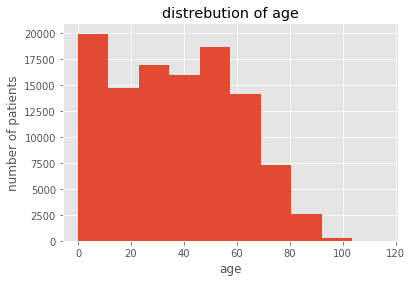

In [13]:
hestogram('age')

> the most common age group is (less than 10 years)

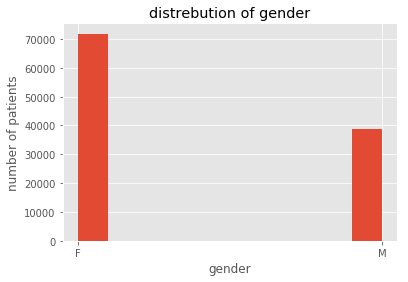

In [14]:
hestogram('gender')

> Females are much more than Males

### Is There A High Percentage Of Medically Compromised Patients ?

In [15]:
#defining a function for pie chart 
def pie_chart(column_name,labels):
    plt.style.use("ggplot")
    parameter=df[column_name].value_counts()
    plt.pie(parameter,labels=labels)
    plt.title('percentage of {} in patients in the data set'.format(column_name))
    plt.legend()



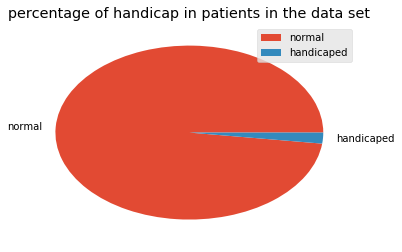

In [16]:
labels=['normal','handicaped']
pie_chart('handicap',labels)

> the percentage of patients with **handcap** is **low**.

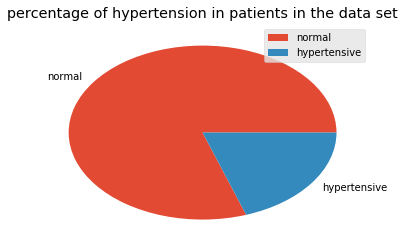

In [17]:
labels=['normal','hypertensive']
pie_chart('hypertension',labels)

> there is a **relatively high** percentage of **hypertensive** patients in the data set.

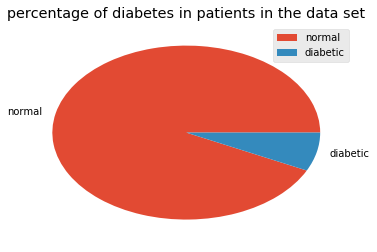

In [18]:
labels=['normal','diabetic']
pie_chart('diabetes',labels)

> the percentage of **diabetic** patients is **low**.

### Is There A High Percentage Of alcoholic abusers in the data set ?

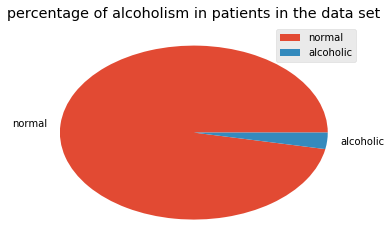

In [19]:
labels=['normal','alcoholic']
pie_chart('alcoholism',labels)

> **low** percentage of patients in the data set are **alcholic abusers**.

### Is There A High Percentage Of patients  enrolled in Brasilian welfare program?

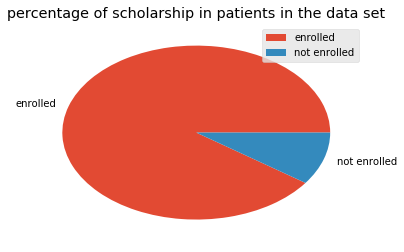

In [20]:
labels=['enrolled','not enrolled']
pie_chart('scholarship',labels)

> the percentage of patients **enrolled** in Brasilian welfare program is **low**.

### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?


> the number of diabetic patients is lower than number of non diabetic aptients, so to study the effect od diabetes we are going to use **proportions** instead of actual numbers.**(this is applied for all other columns)**

In [21]:
#defining a function for bar chart:
def bar_chart(column_name,labels):
    #calculating proportions:
    totals=df[column_name].value_counts()
    counts=df.groupby('no_show')[column_name].value_counts()['No']
    proportions=counts/totals
    #bar chart
    locations=np.arange(len(proportions))
    plt.style.use("ggplot")
    plt.bar(locations,proportions,tick_label=labels,alpha=.7) 
    plt.title('effect of {}'.format(column_name))
    plt.ylabel('percentage of patients who came')
    plt.xlabel(column_name)
    plt.legend()
    

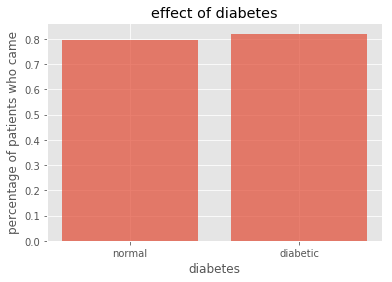

In [22]:
labels=['normal','diabetic']
bar_chart('diabetes',labels)

 > diabetes **do not** have a significant effect on percentage of patients who came to the appointment.

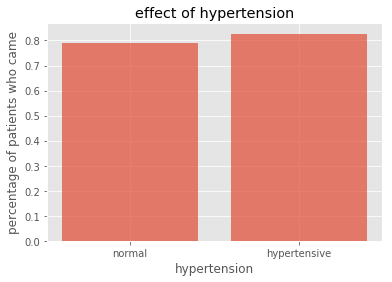

In [23]:
labels=['normal','hypertensive']
bar_chart('hypertension',labels)

> hypertension **do not** have a significant effect on percentage of patients who came to the appointment.

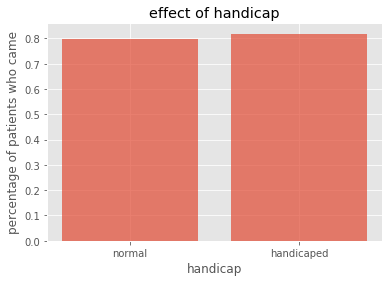

In [24]:
labels=['normal','handicaped']
bar_chart('handicap',labels)

> handicap **do not** have a significant effect on percentage of patients who came to the appointment.

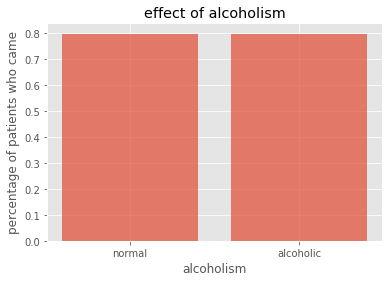

In [25]:
labels=['normal','alcoholic']
bar_chart('alcoholism',labels)

> alcoholism **do not** have a significant effect on percentage of patients who came to the appointment.

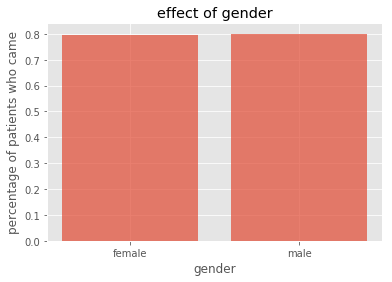

In [26]:
labels=['female','male']
bar_chart('gender',labels)

> gender **do not** have a significant effect on percentage of patients who came to the appointment.

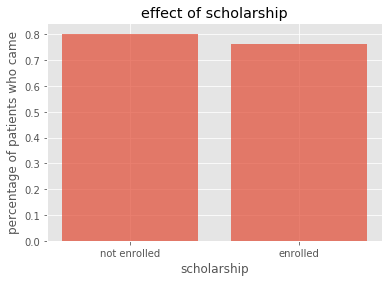

In [27]:
labels=['not enrolled','enrolled']
bar_chart('scholarship',labels)

> patients who are **enrolled** in Brasilian welfare program have **slightly lower** percentage.

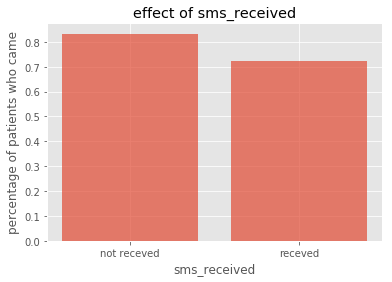

In [28]:
labels=['not receved','receved']
bar_chart('sms_received',labels)

>patients **receved sms** have **slightly lower** percentage!!!

In [29]:
#defining another bar function sutable for age and neighbourhood colomns
def bar_chart_2(column_name):
    #calculating proportions:
    totals=df[column_name].value_counts()
    counts=df.groupby('no_show')[column_name].value_counts()['No']
    proportions=counts/totals
    plt.style.use("fivethirtyeight")
    proportions.plot(kind='bar',alpha=.6,figsize=(40,10))
    plt.ylabel('percentage of patients who came')
    plt.xlabel(column_name)
    plt.title('effect of {}'.format(column_name))
    plt.legend()
    

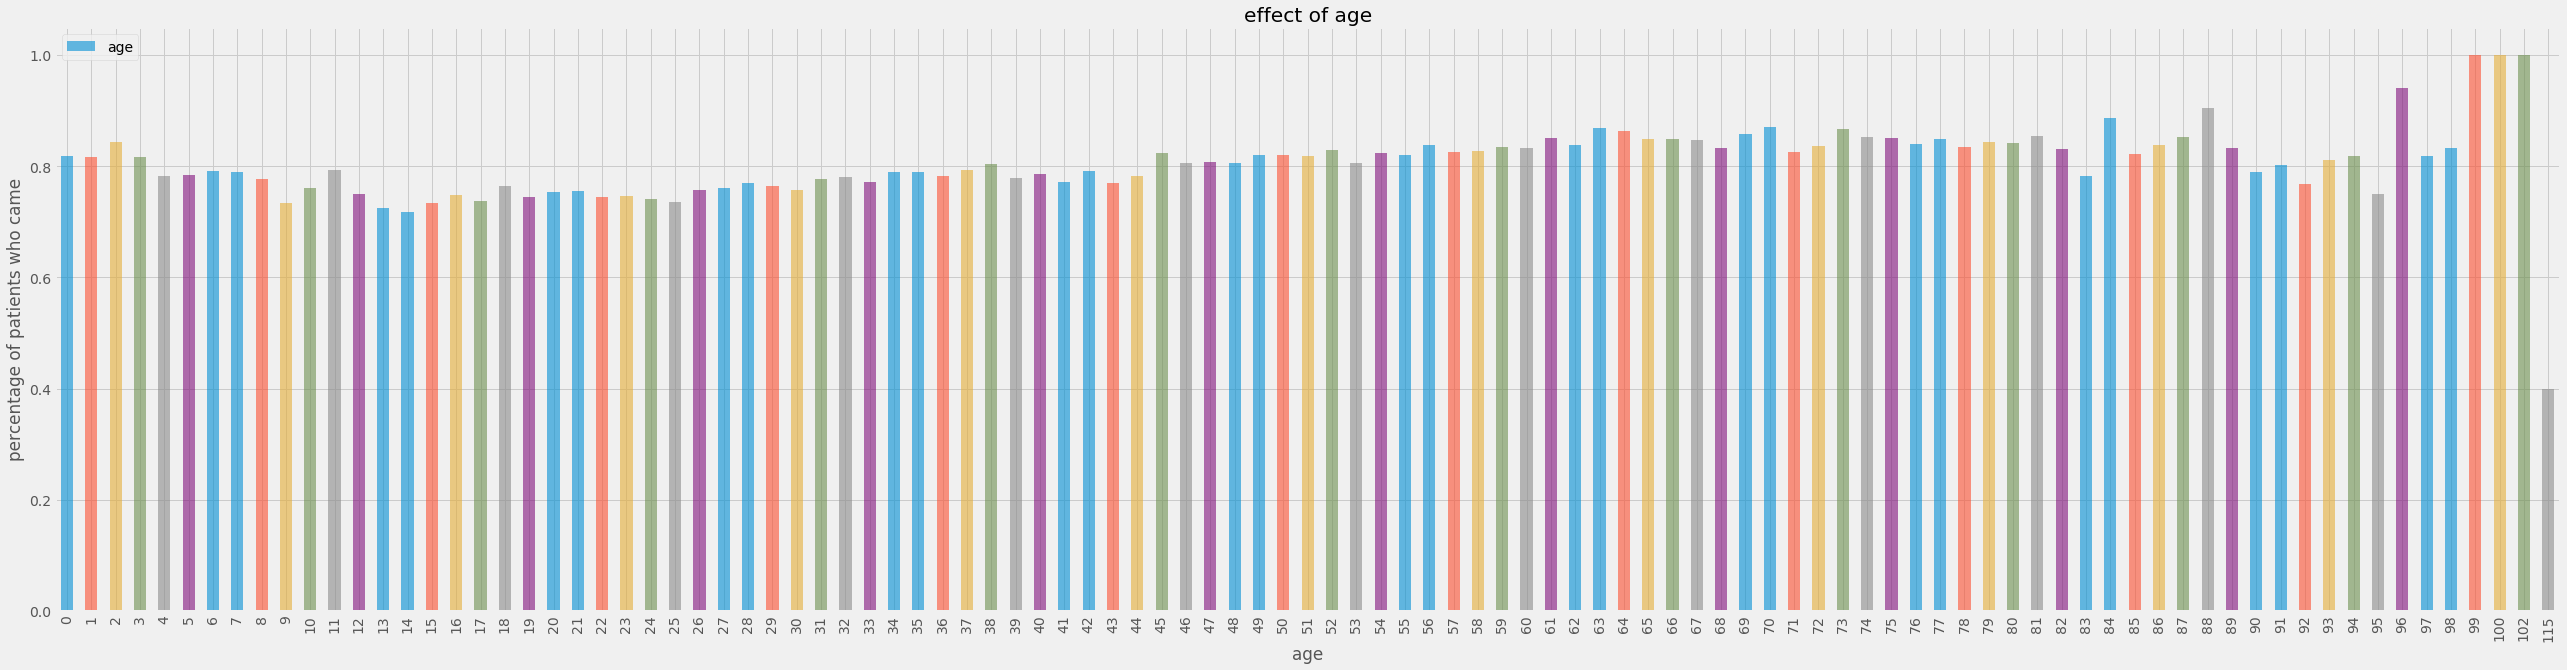

In [30]:
bar_chart_2('age')

> age groups (less than 10 years) and (between 60 and 80 years) have a **higher** percentage of attendance.

> age group(from 10 to 30 years) has a **lower** percentage of attendance.

> ages where the percentage is very highe or very low is **not reliable**, because it has a very low **number** of patients.

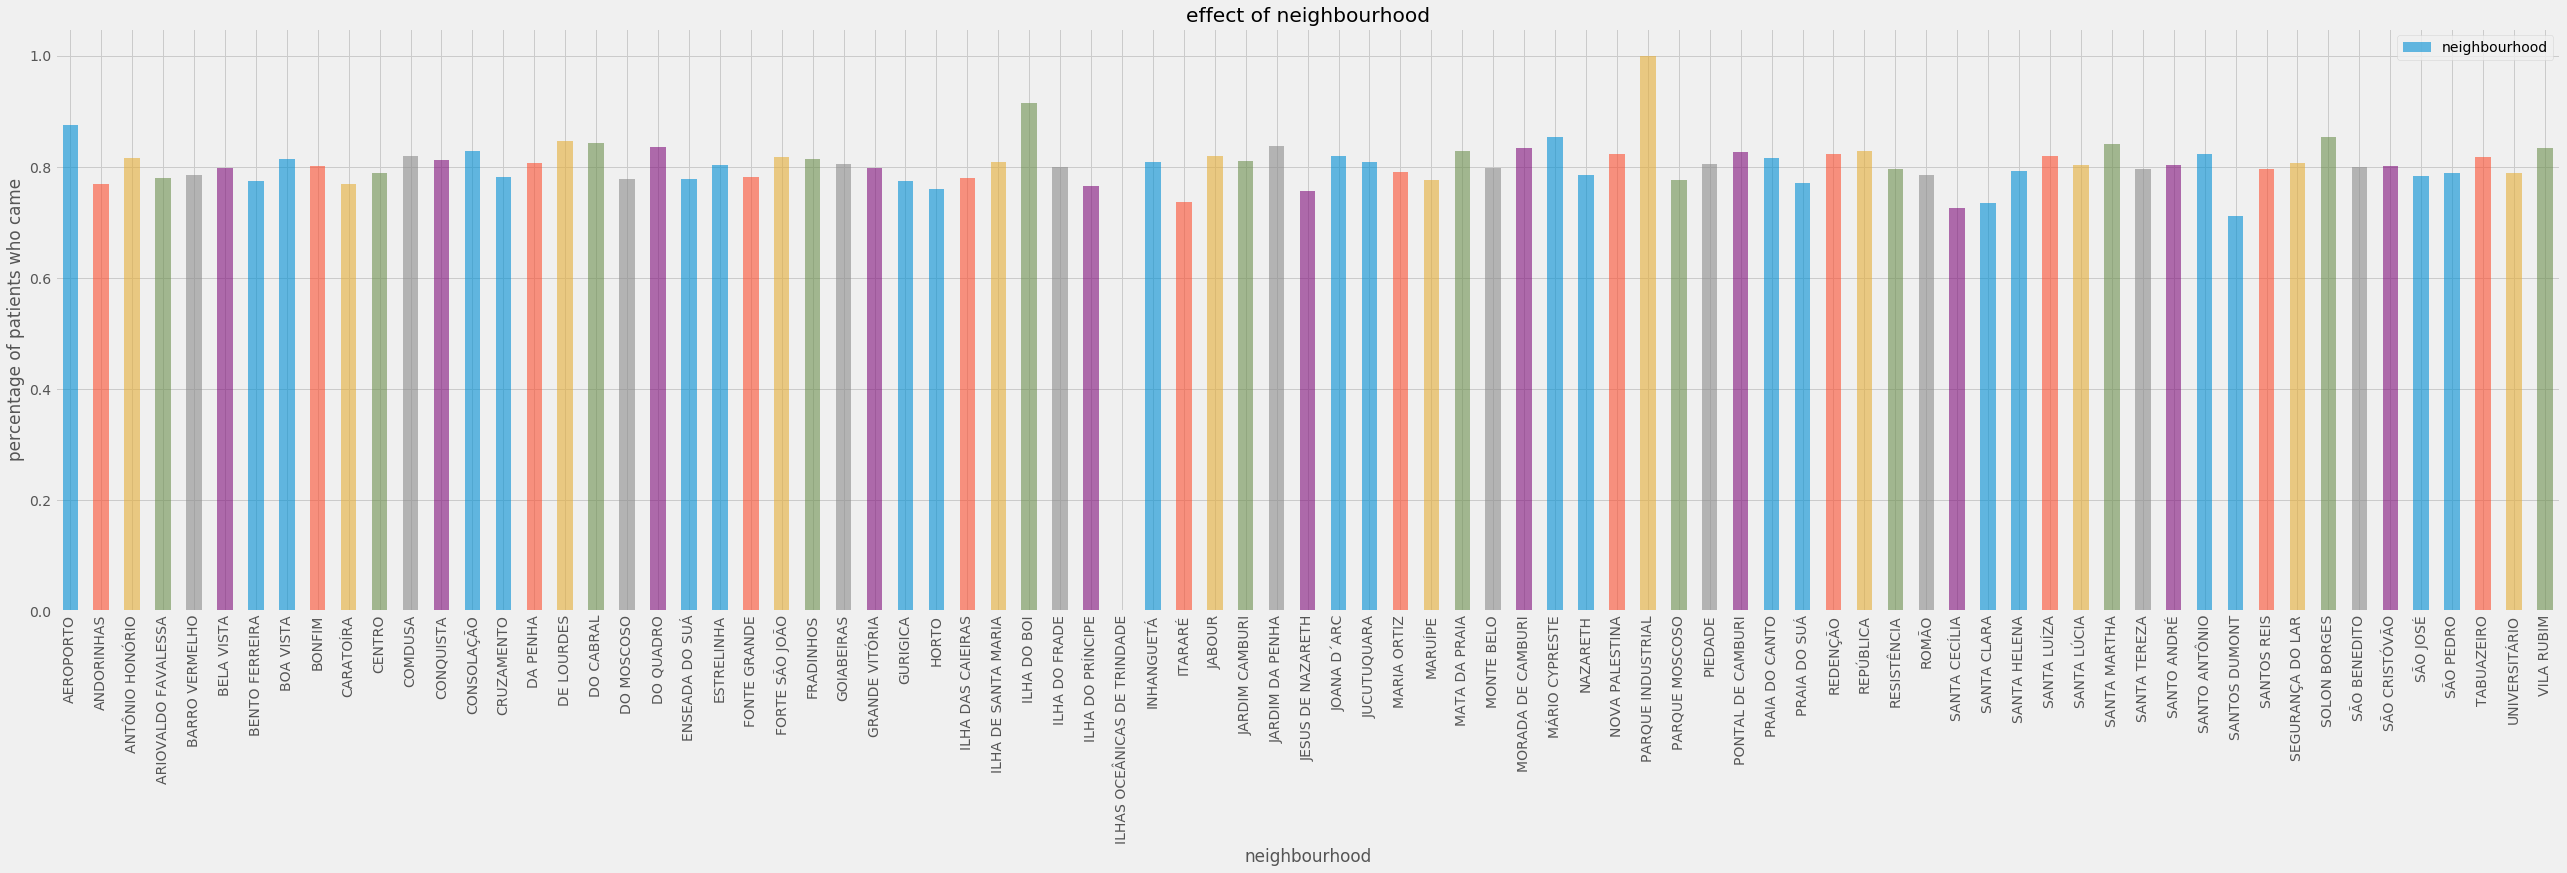

In [31]:
bar_chart_2('neighbourhood')

> some neighbourhoods have higher percentage of attendence than others, so neighbourhood has a **slight effect** on percentage of attendance.

> neighbourhoods where the percentage is very highe or very low is **not reliable**, because it has a very low **number** of patients.

<a id='conclusions'></a>
## Conclusions
#####  Q1: Is There A High Percentage Of Medically Compromised Patients ?
   * generally **No** but there is a relatively high percentage of hypertensive patients.
   
##### Q2: Is There A High Percentage Of alcoholic abusers in the data set ?
   * No, the percentage of alcohol abusers is **low**.
    
##### Q3:  Is There A High Percentage Of patients enrolled in Brasilian welfare program ?
   * No, the percentage of patients enrolled in Brasilian welfare program is **low**.
     
##### Q4: What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
   * 1- Enrollment in Brasilian welfare program : 
        * patients who are **enrolled** in Brasilian welfare program have slightly **lower** percentage of attendance.
   * 2- Receving SMS :
        * patients Who **receved sms** have **slightly lower** percentage of attendance !!!
   * 3- Age :
        * age groups (less than 10 years) and (between 60 and 80 years) have a **higher** percentage of attendance.
        * age group(from 10 to 30 years) has a **lower** percentage of attendance.
        * ages where the percentage is very highe or very low is **not reliable**, because it has a very low **number** of patients.
   * 4- neighbourhood : 
        * some neighbourhoods have higher percentage of attendence than others, so neighbourhood has a **slight effect** on percentage of attendance.
        * neighbourhoods where the percentage is very highe or very low is **not reliable**, because it has a very low **number** of patients.
>* **NOTE**:  additional research can be done to explore **why** thes factors affect pecentage of patient attendance that way?!      

### Limitations
> most of factors have no segnificant effect on wether the patient will show up for there appointment .

> Enrollment in Brasilian welfare program, Receving SMS, Age and Neighbourhood have **SLIGHT** effect, and additional research is neede to explore **why** thes factors affect pecentage of patient attendance that way?!      



In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0